In [1]:
import piplite
await piplite.install('seaborn')
await piplite.install('mlxtend')
await piplite.install('missingno')

from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno
from sklearn.preprocessing import StandardScaler
sb.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# OSEMN Pipeline
1. O - obtaining our data
2. S - scrubbing/cleaning our data
3. E - explorint/visualizing our data will allow us to ind patterns and trends
4. M - modeling our data will give us our predictive power
5. N - INterpreting our data

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [5]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [6]:
df.shape

(768, 9)

Can the minimum values of columns be zero? (glucose, bloodpressure, skinthickness, insulin, BMI)

Replace 0s with Nan so replacing them is easier

In [7]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


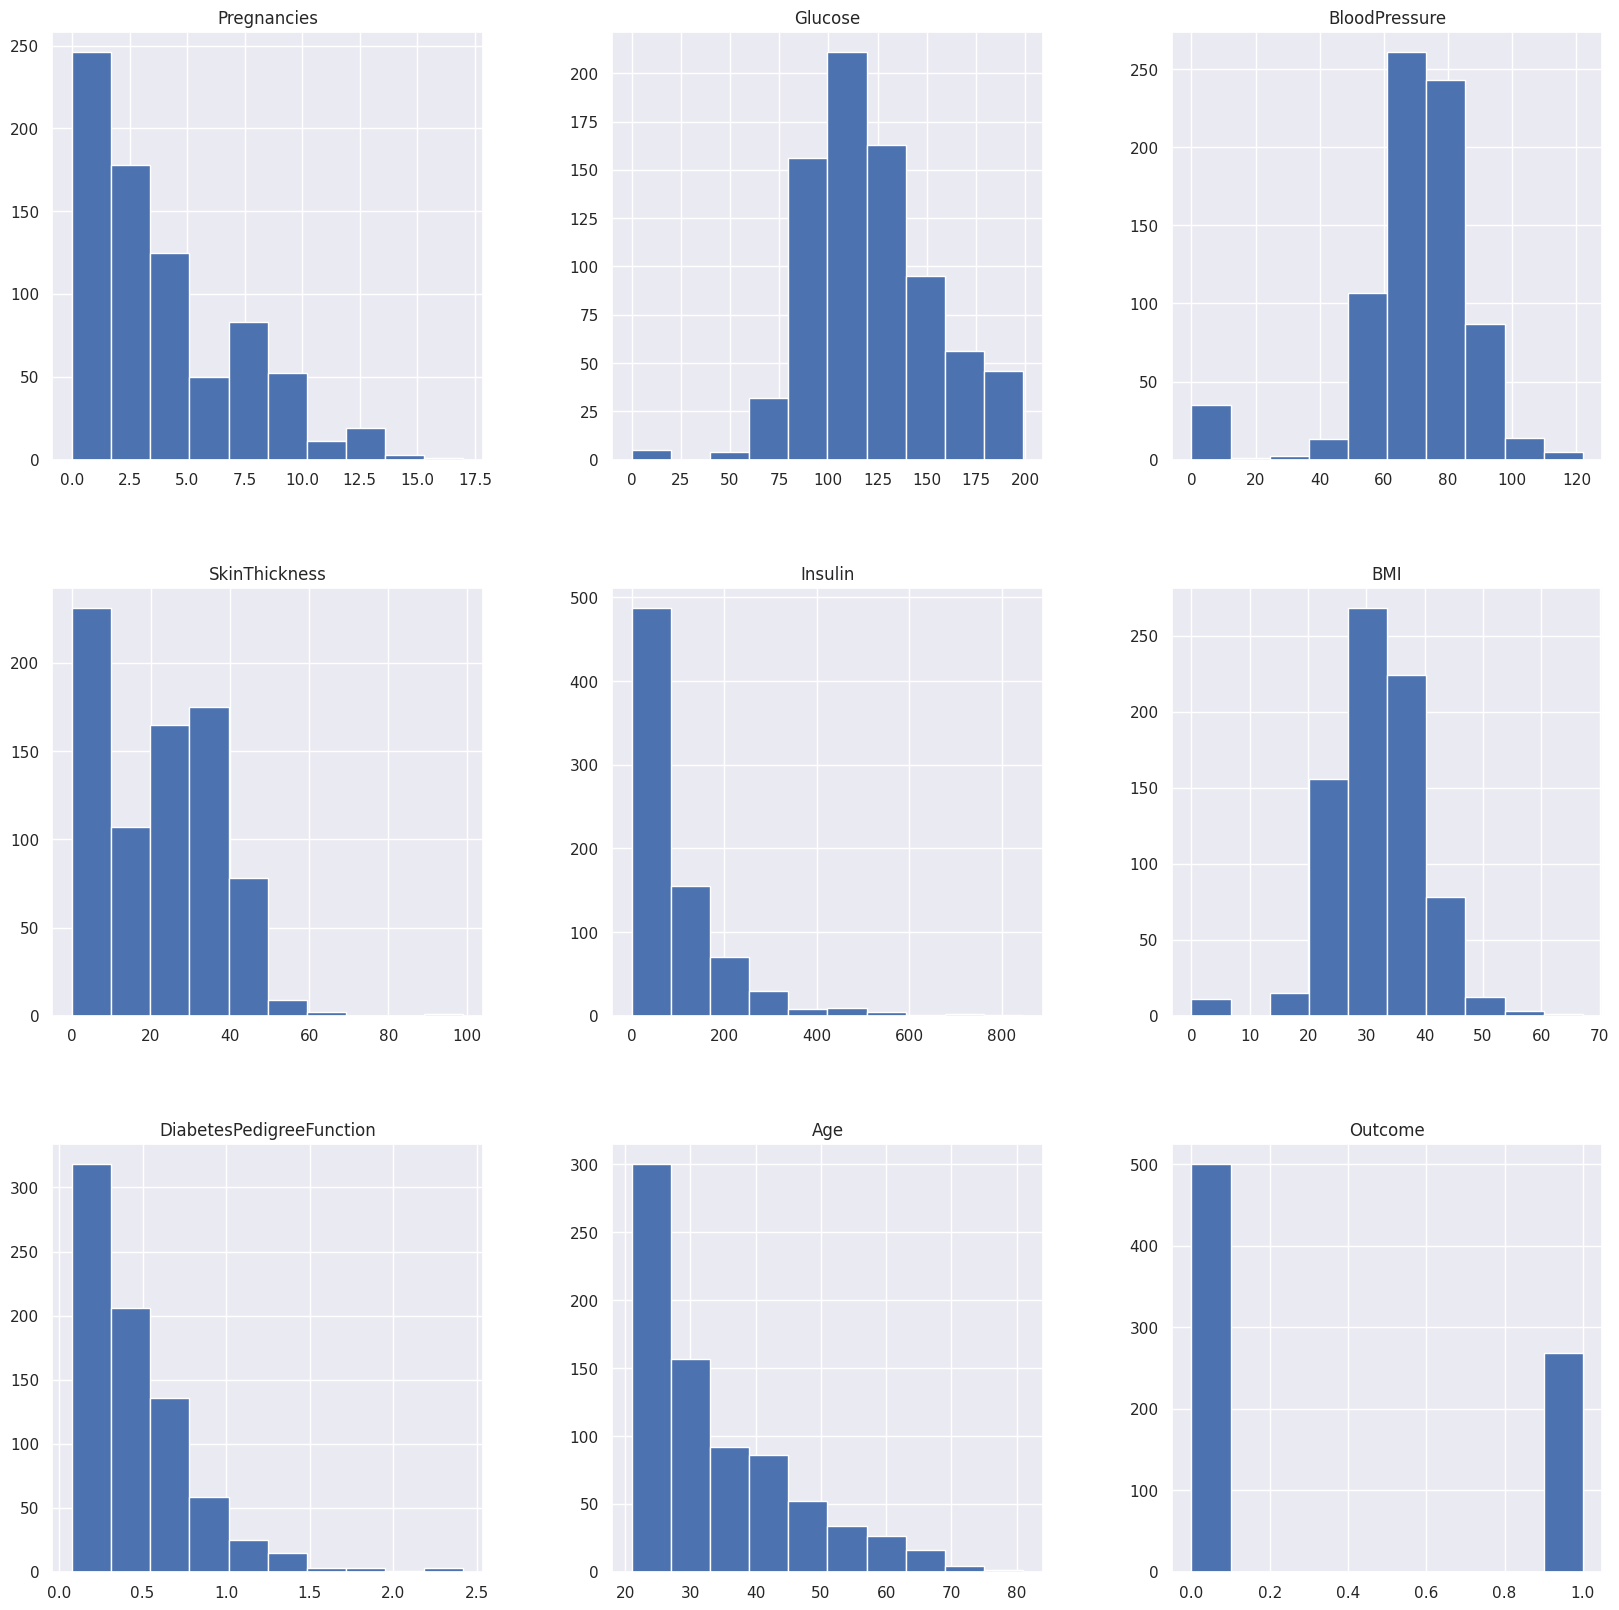

In [8]:
p = df.hist(figsize = (20,20))

In [9]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

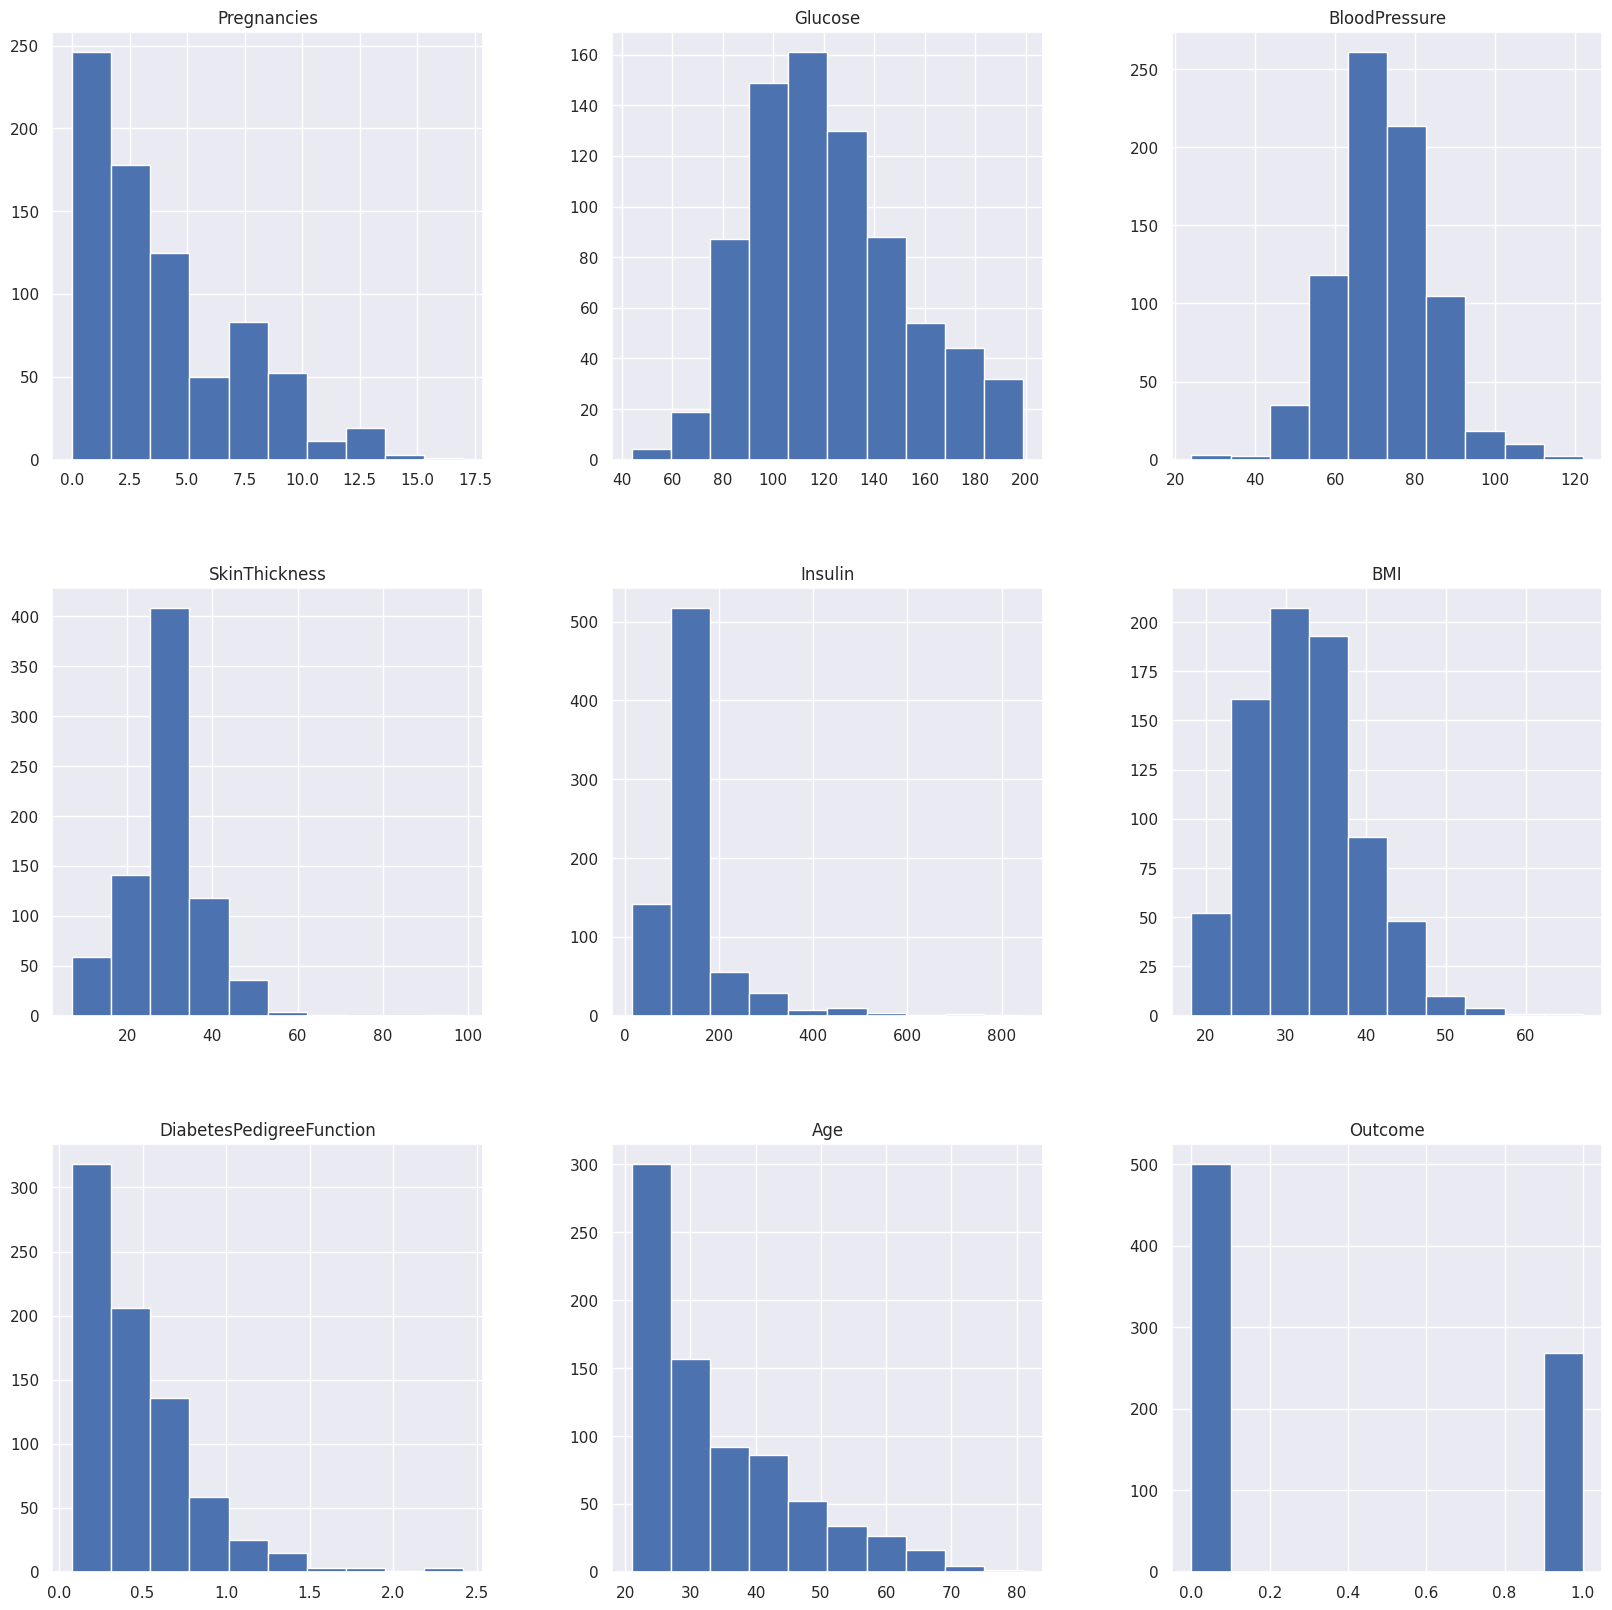

In [10]:
p = df_copy.hist(figsize = (20,20))

In [11]:
df.shape

(768, 9)

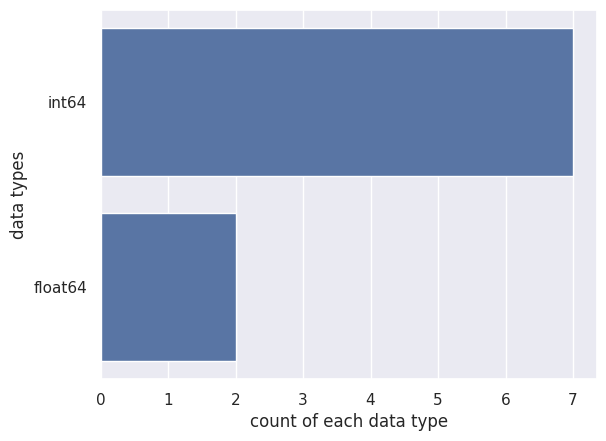

In [12]:
sb.countplot(y=df.dtypes, data=df)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

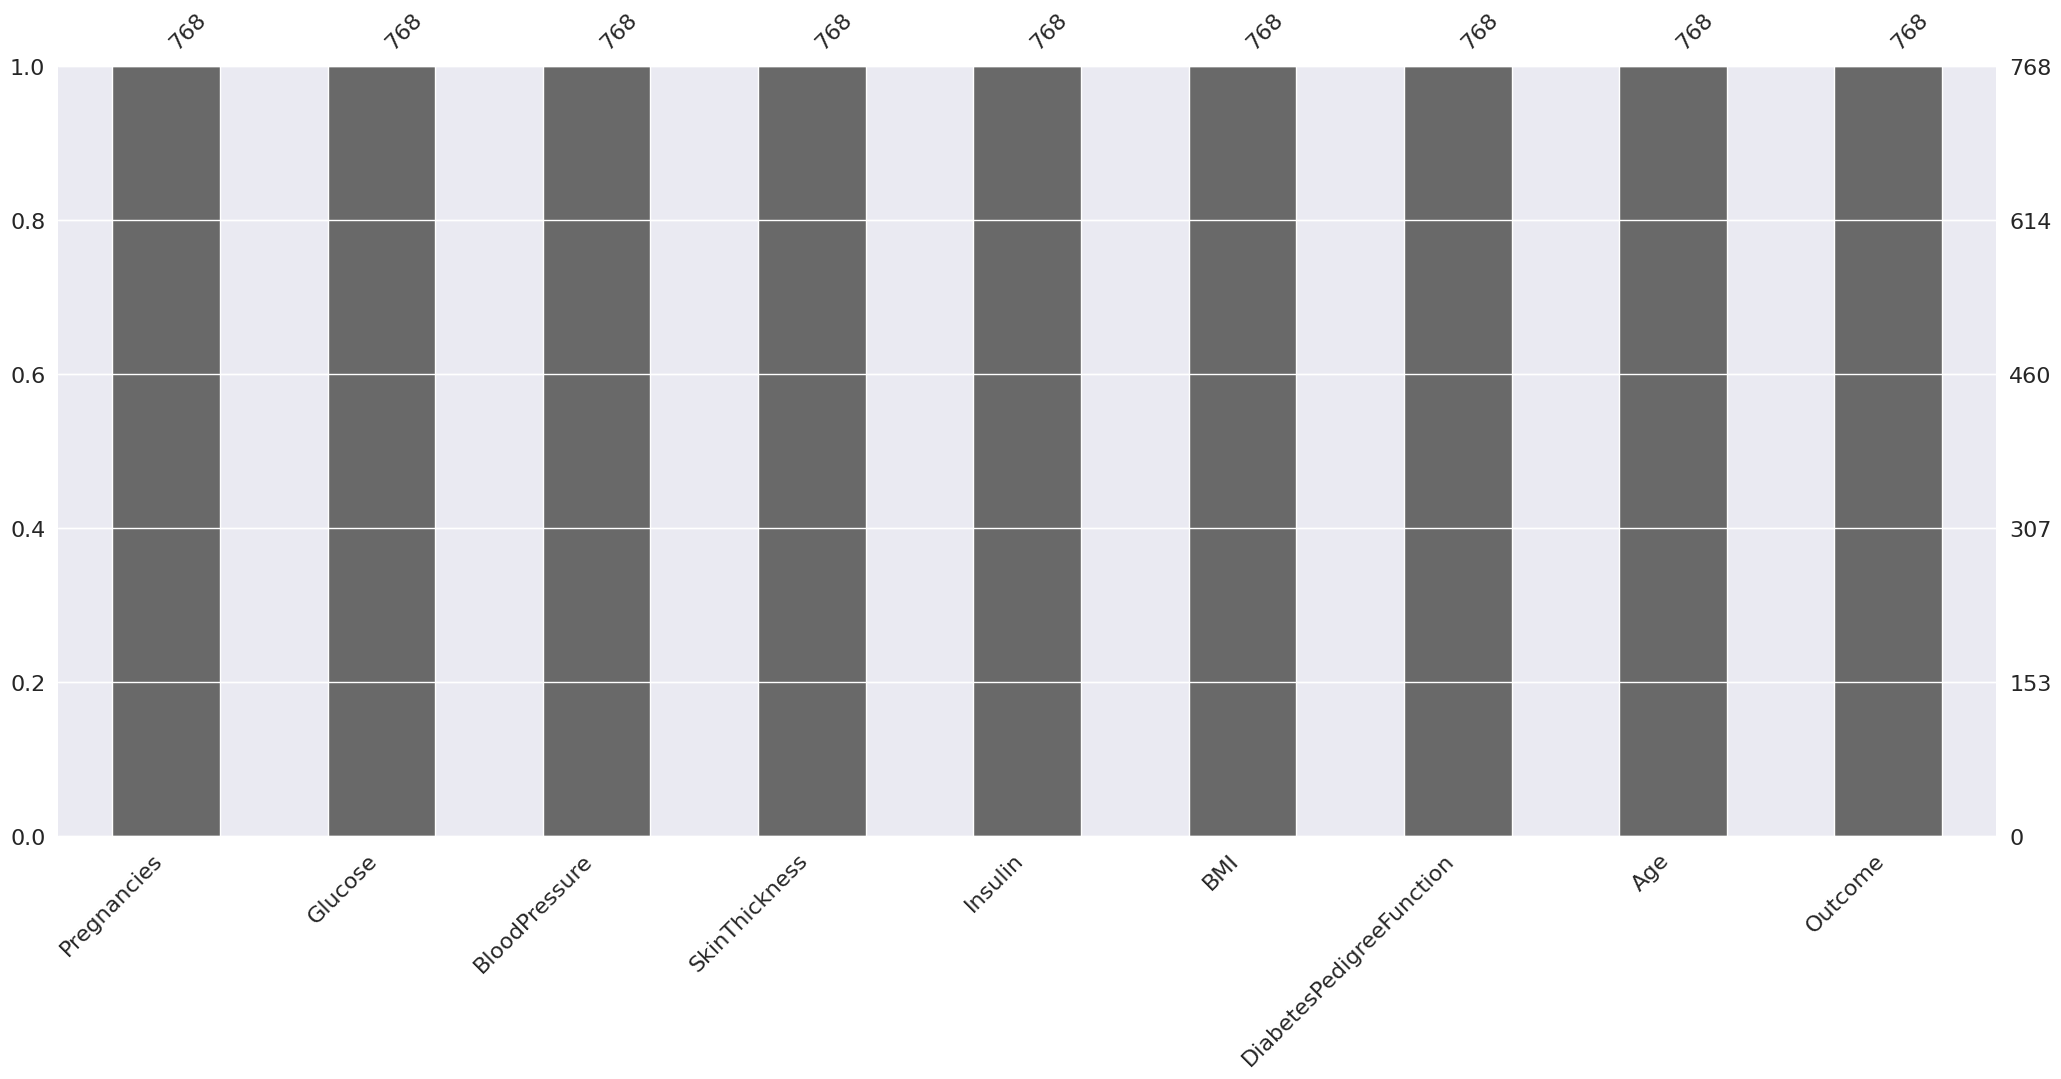

In [13]:
# null count analysis??
p = msno.bar(df)

0    500
1    268
Name: Outcome, dtype: int64


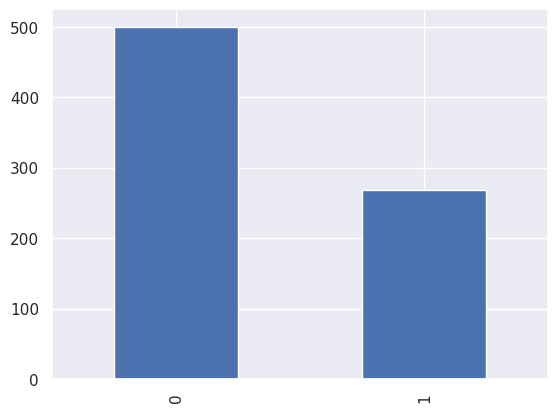

In [14]:
color_wheel = {1: "#0392cf",
               2: "#7bc043"}
colors = df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(df.Outcome.value_counts())
p = df.Outcome.value_counts().plot(kind="bar")

Shows that data is biased towards people without diabetes (0)

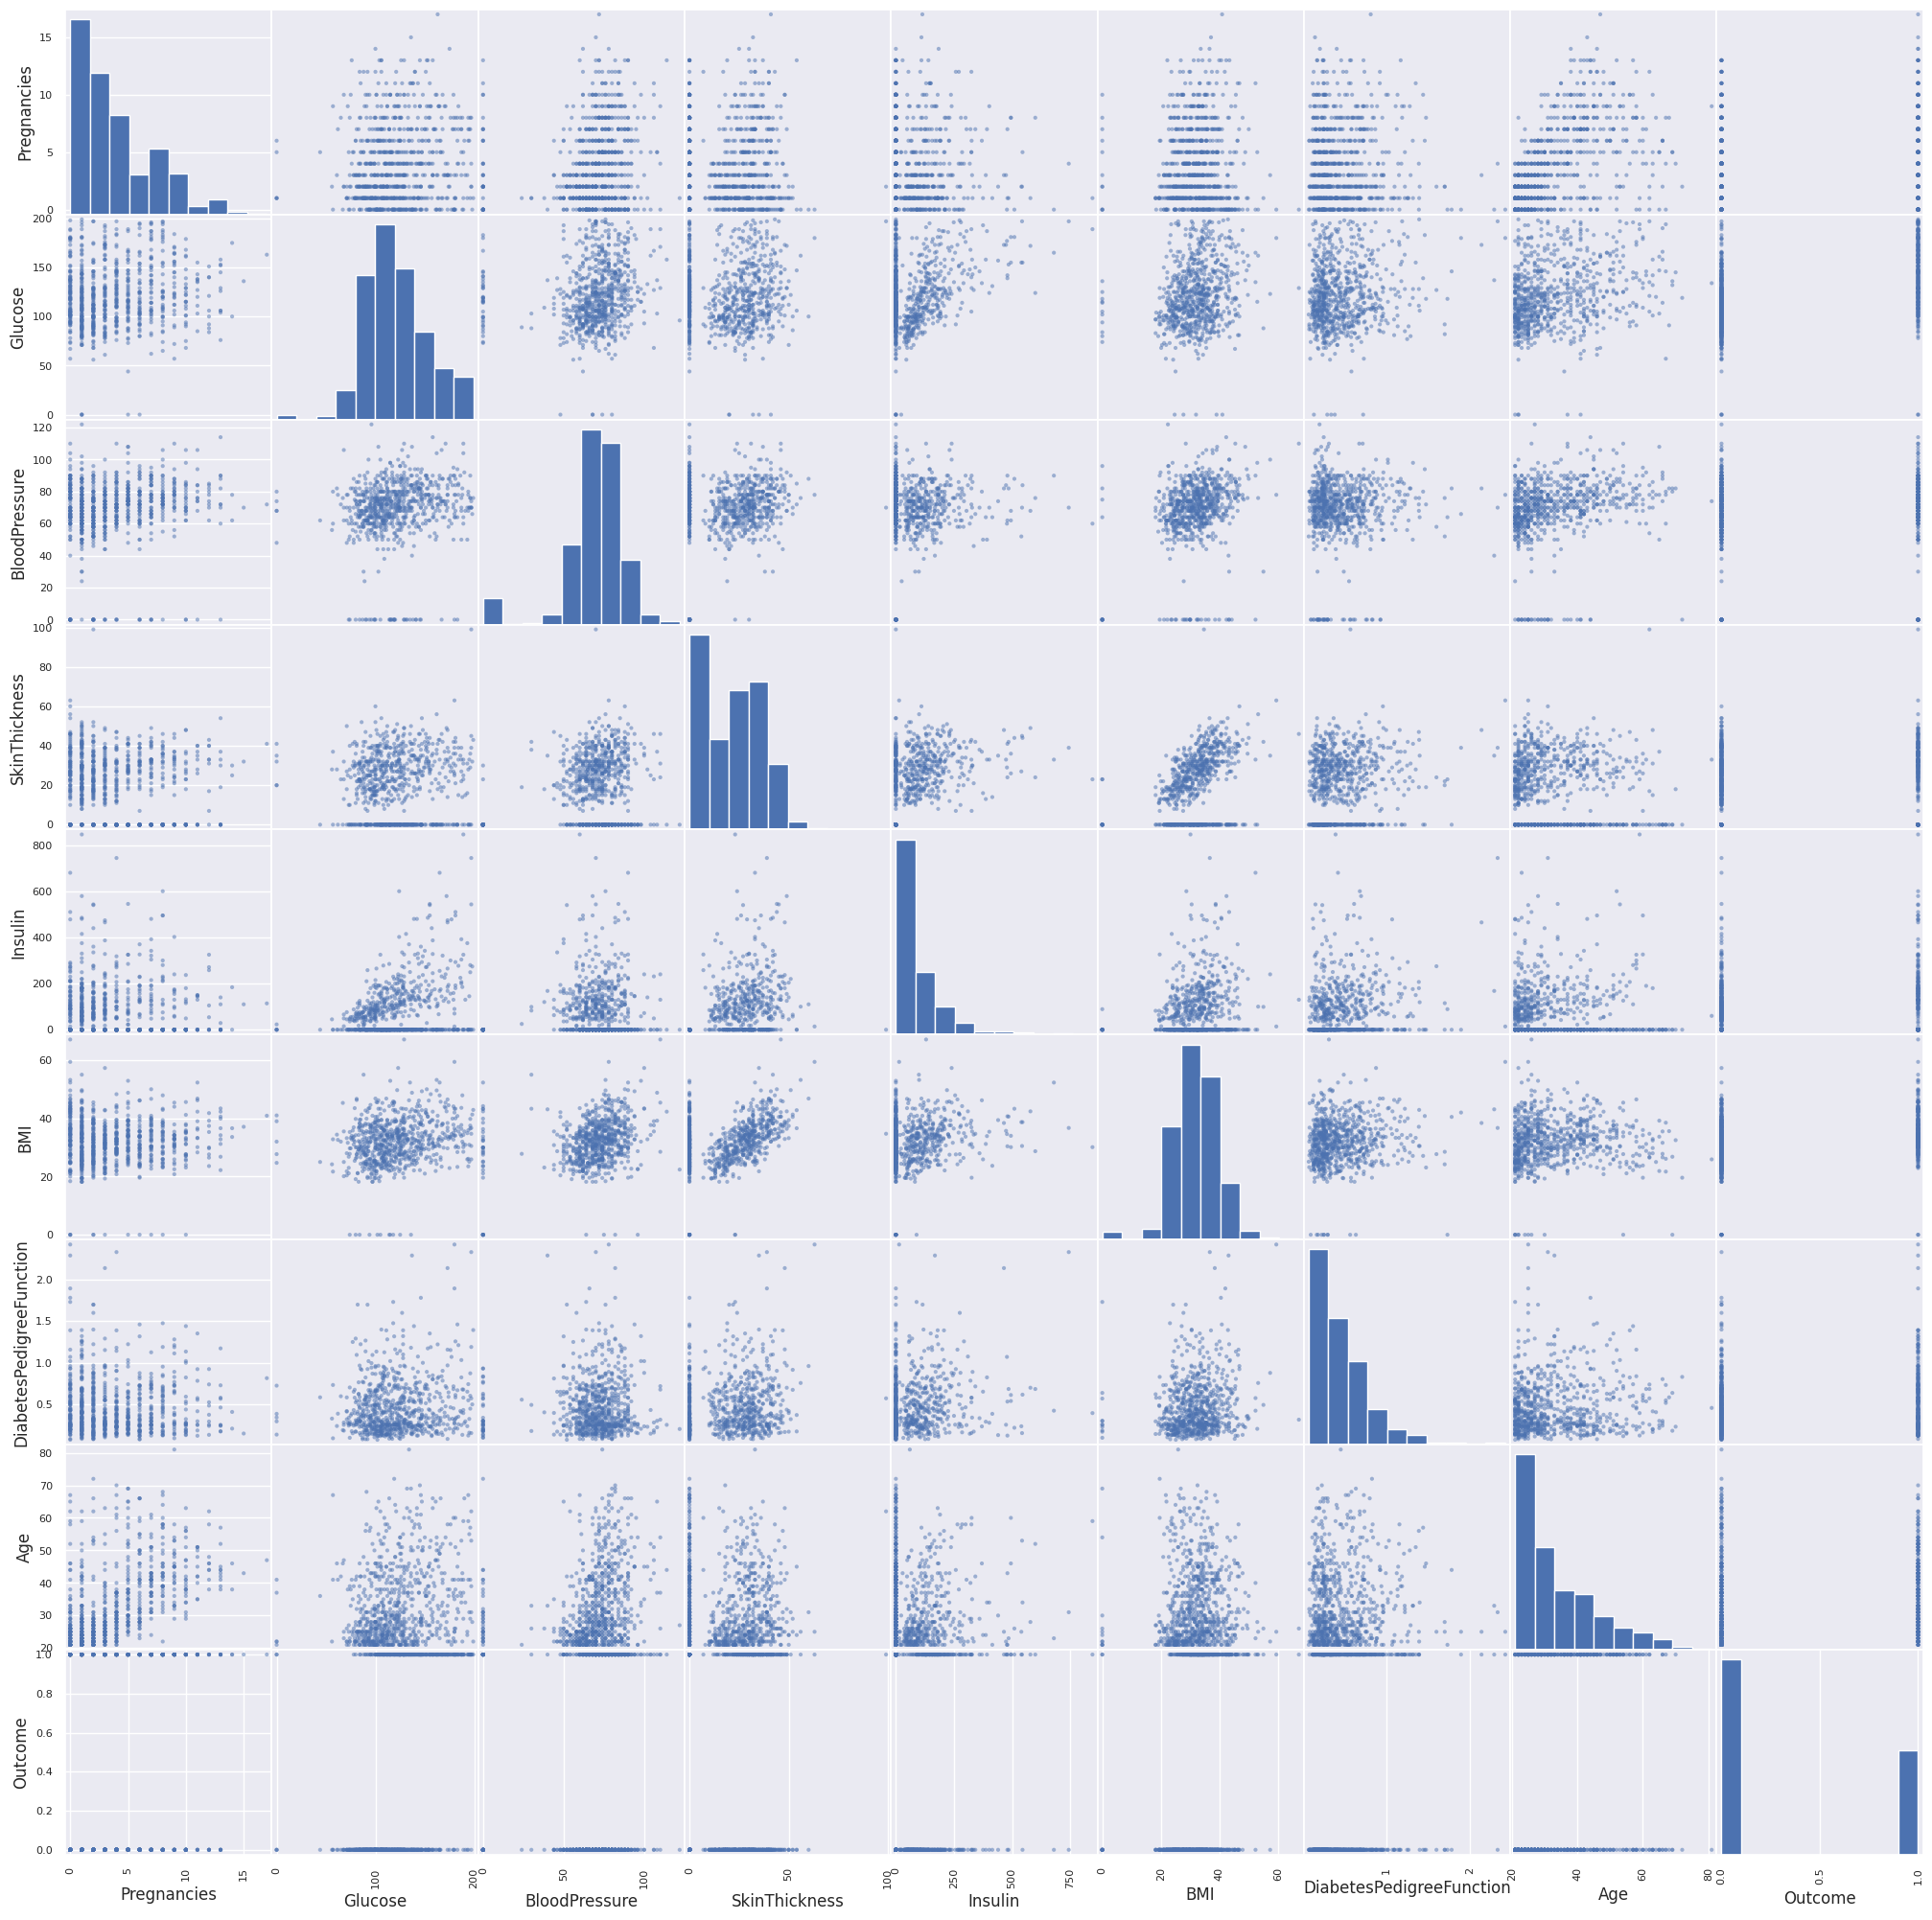

In [15]:
p=scatter_matrix(df, figsize=(25,25))

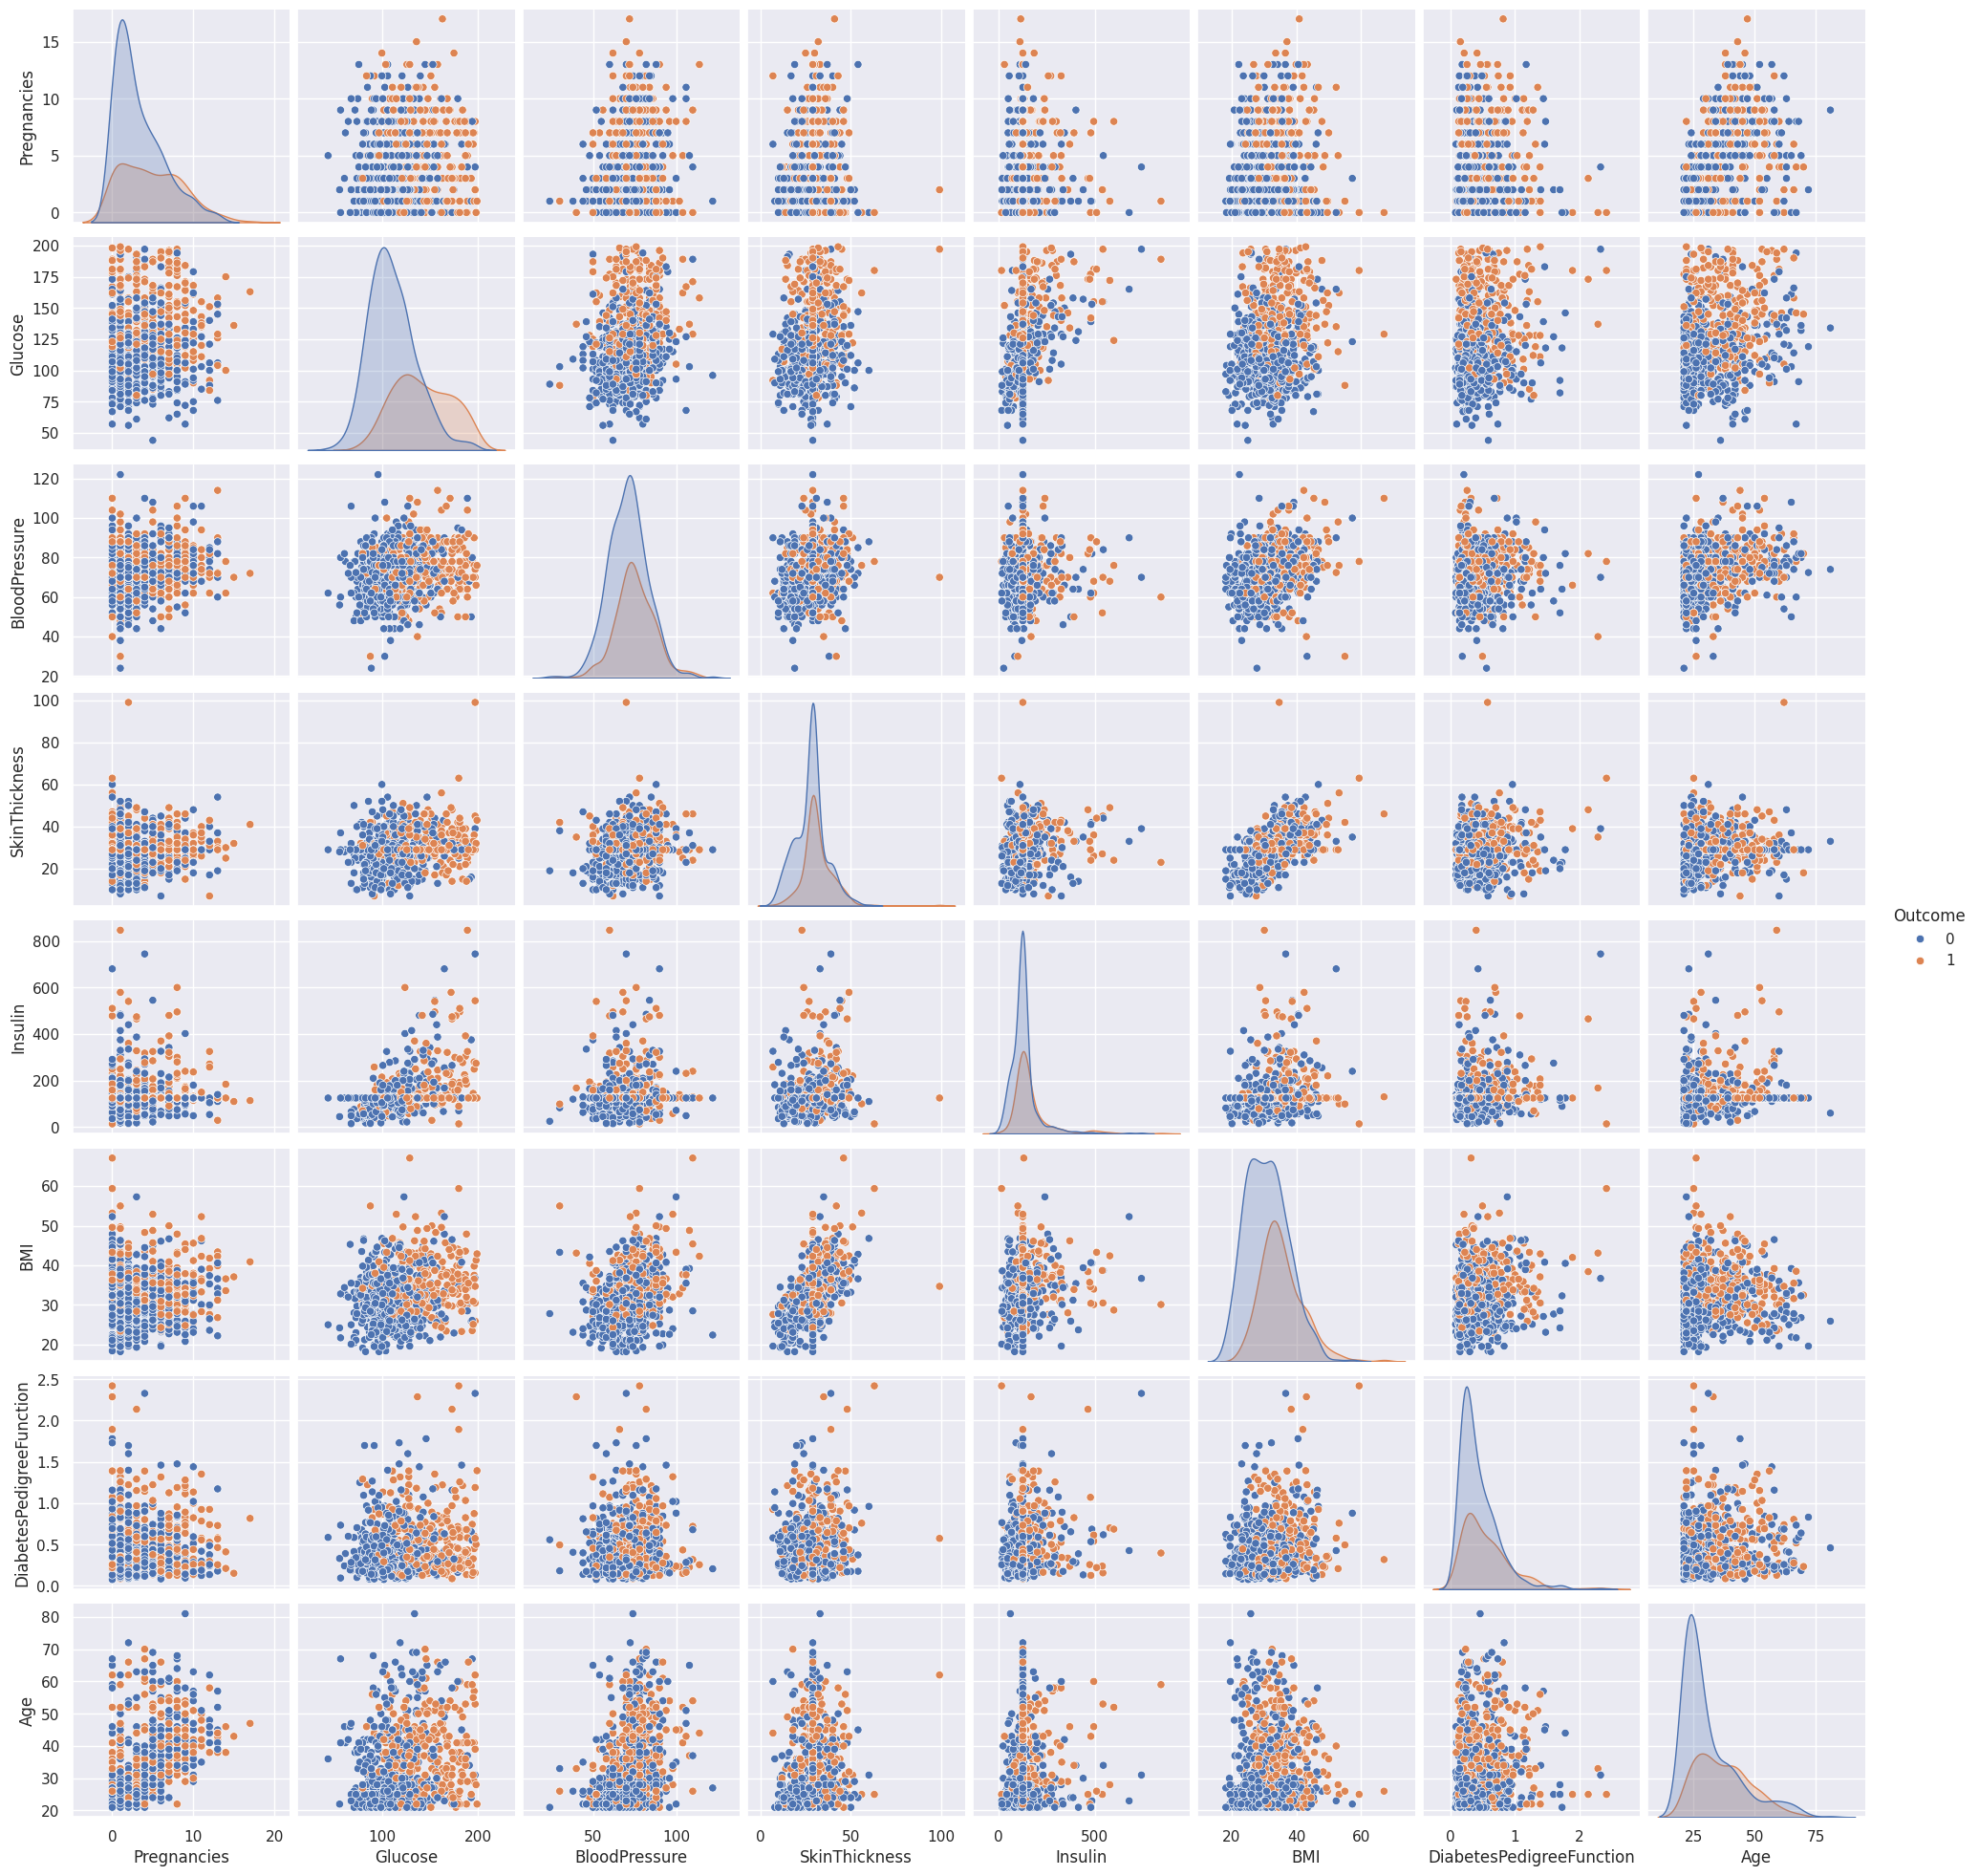

In [16]:
p=sb.pairplot(df_copy, hue = 'Outcome')

## Pearson's correlation coefficient
finds relationship between two quantities

meeasure of the strength of association between two variables

values between -1 and +1

Use heatmap to show correlation (between unclean data here)

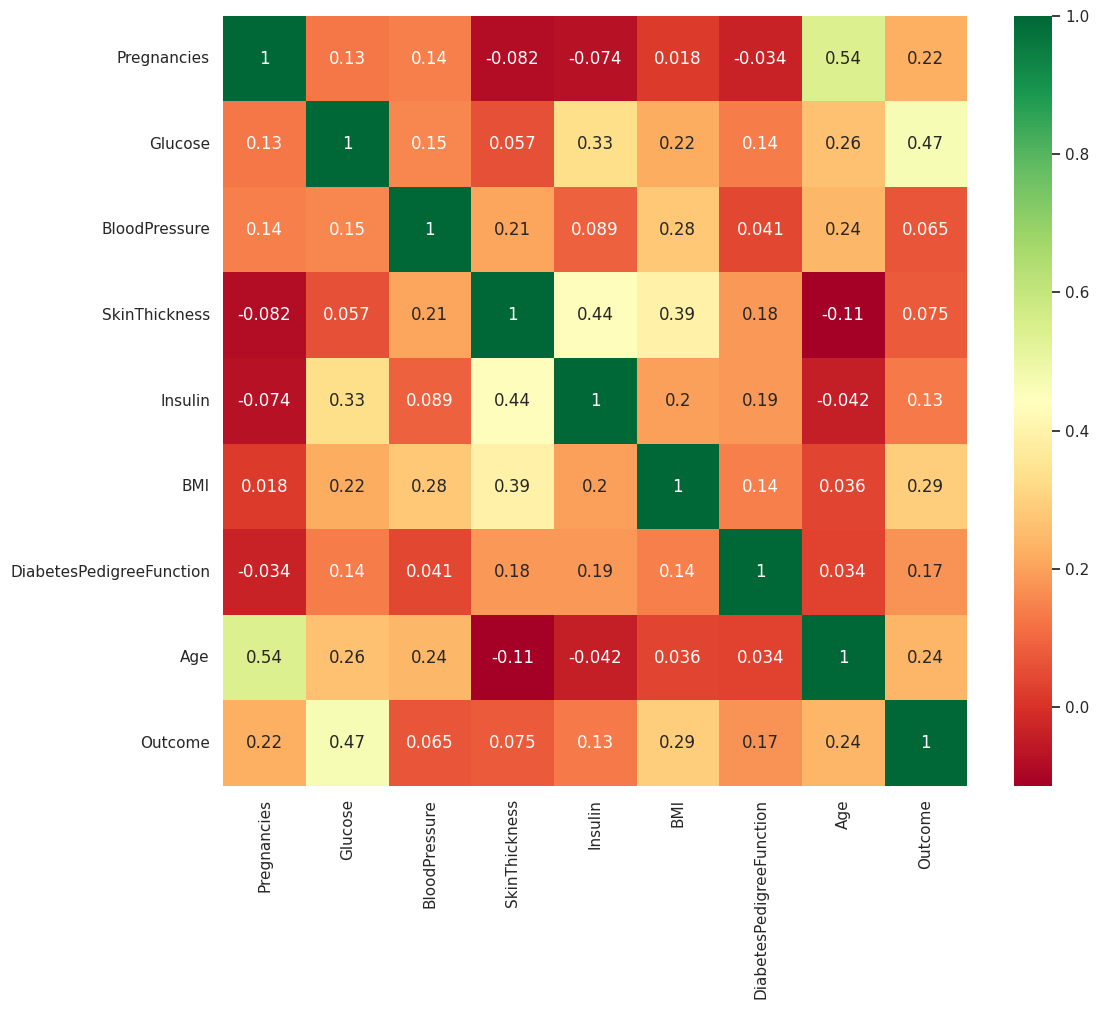

In [17]:
plt.figure(figsize=(12,10))
p=sb.heatmap(df.corr(), annot=True, cmap='RdYlGn')

Heatmap for clean data

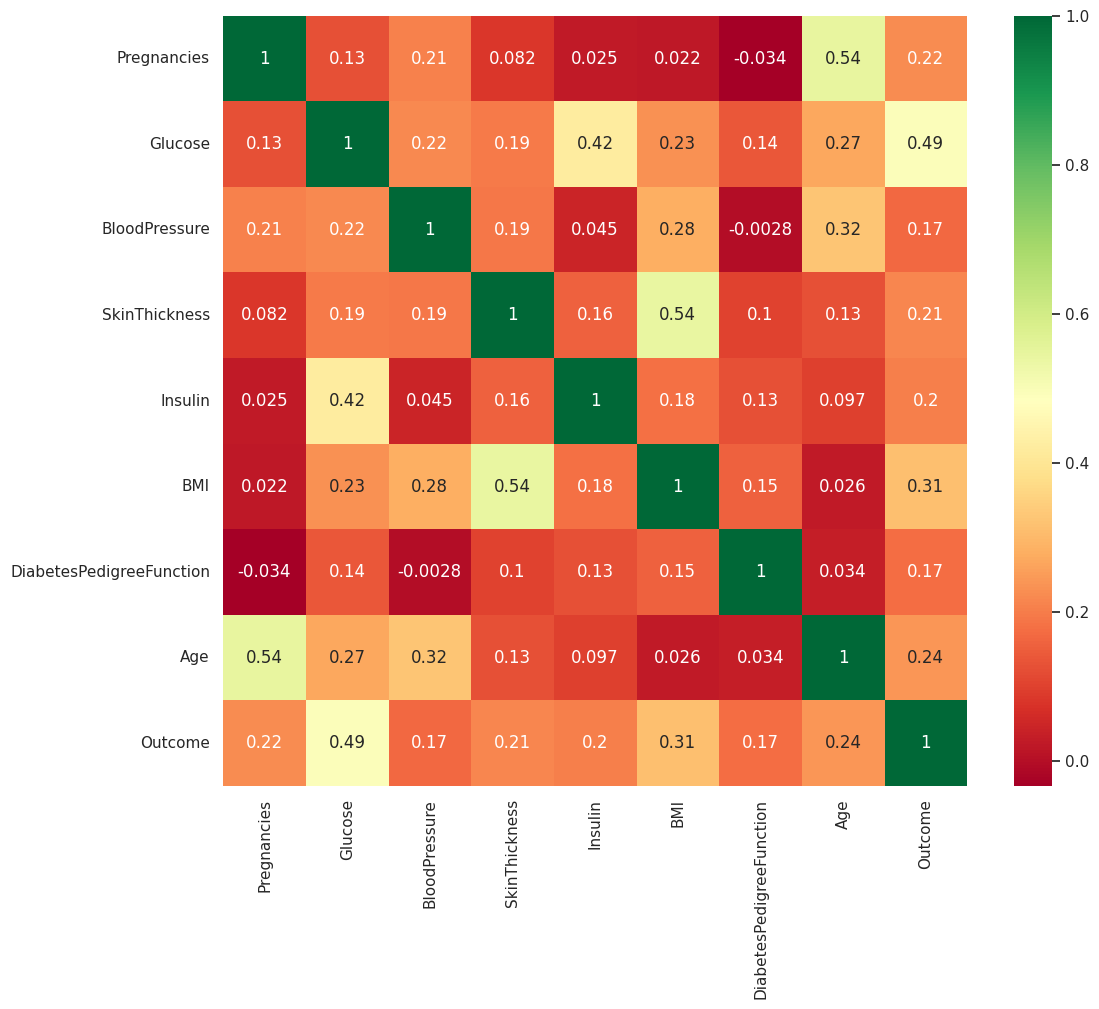

In [18]:
plt.figure(figsize=(12,10))
p=sb.heatmap(df_copy.corr(), annot=True, cmap='RdYlGn')

# Scaling the data!

z = (Xi - U)/(theta)

U = 0 and theata = 1
Values between -1 and 1

In [19]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df_copy.drop(["Outcome"], axis=1),),
                 columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                          'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [20]:
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1    -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2     1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [21]:
Y = df_copy.Outcome

# Test Train Split and Cross Validation

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=42, stratify=Y)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
# creating the testing and training scores
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train, Y_train)

    train_scores.append(knn.score(X_train, Y_train))
    test_scores.append(knn.score(X_test, Y_test))

K-nearest neighbors is a non-parametric, supervised learning classifier, which uses proximity to make classifications
or predictions about the grouping of an individual datapoints.

In [24]:
# score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100, list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [25]:
# score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100, list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.5625 % and k = [11]


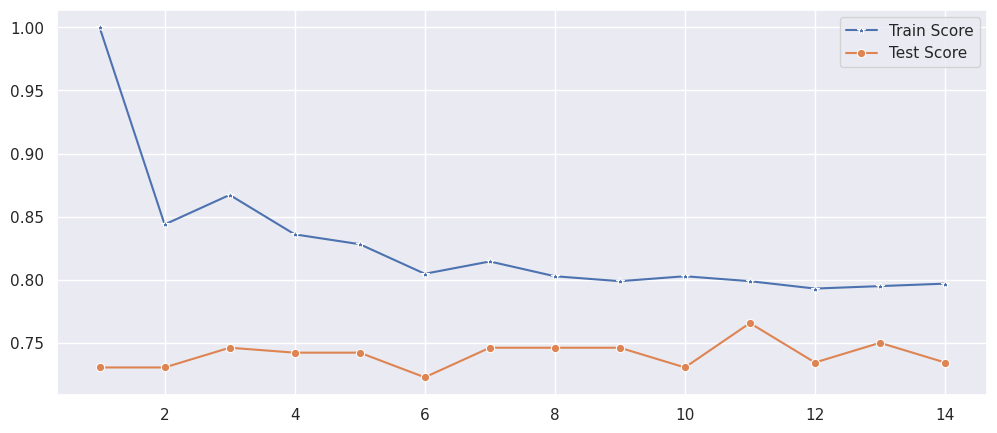

In [26]:
plt.figure(figsize=(12,5))
p=sb.lineplot(x=range(1,15), y=train_scores, marker='*', label='Train Score')
p=sb.lineplot(x=range(1,15), y=test_scores, marker='o', label='Test Score')

Best result is at k=11 due to the lowest amount of error

In [27]:
# setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.765625

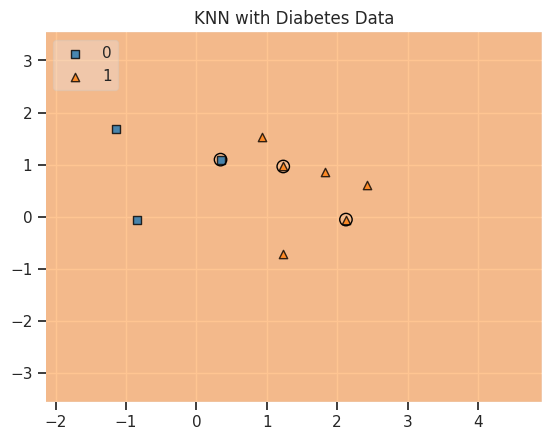

In [28]:
# trying to plot decision boundary
value = 20000
width = 20000
plot_decision_regions(X.values, Y.values, clf=knn, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# adding axes annotations
plt.title('KNN with Diabetes Data')
plt.show()

# Model performance analysis

## Confusion Matrix

In [30]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
# getting the predictions using the classifier we had fit above
Y_pred = knn.predict(X_test)
confusion_matrix(Y_test, Y_pred)
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted    0   1  All
True                   
0          142  25  167
1           35  54   89
All        177  79  256

Text(0.5, 19.049999999999997, 'Predicted label')

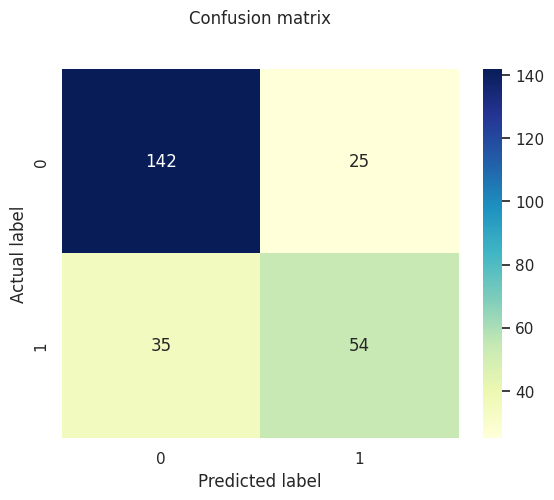

In [32]:
Y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
p = sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Classification Report
Report which includes precision, recall and F1-Score.

### Precision Score
TP - True Positives
FP - False Positives

Precision - Accuracy of positive predictions
TP/(TP + FP)

### Recall Score
FN - False Negatives

Recall (sensitivity or true positive rate): Fraction of positives that were correctly identified.
TP/(TP+FN)

### F1 Score
aka F-Score or F-Measure - Metric for comparing two classifiers
F1 Score is taken into account for precision and recall.
Created by finding the harmonic mean of the two.
F1 = 2 x (precision x recall)/(precision + recall)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



## ROC - AUC 
Reciever Operating Characteristic Curve tells us about how good the model can distinguish between two things (diabetes: yes or no). Better models can accurately distinguish between the two. 

In [35]:
from sklearn.metrics import roc_curve
Y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)

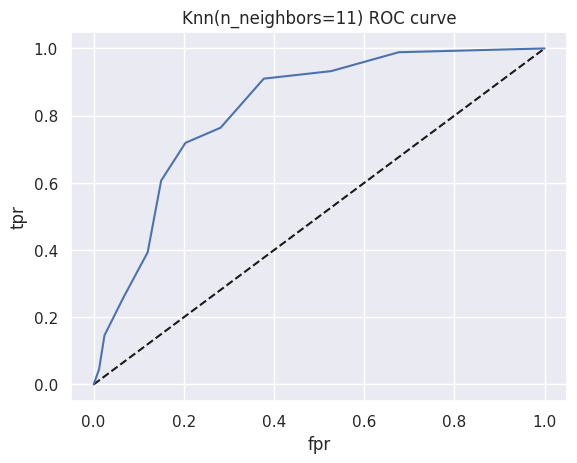

In [36]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [37]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred_proba)

0.8193500639171096

# Hyper Parameter optimization
## Using grid search

In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV
# the paramater to be tuned in knn (and maybe other classifier models) is the n_neibhbors
param_grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X,Y)

print("Best Score